In [1]:
!pip install -U transformers==4.15.0
!pip install -q datasets jiwer

     |################################| 3.4 MB 727 kB/s eta 0:00:01
     |################################| 67 kB 5.1 MB/s  eta 0:00:01
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.0.12
    Uninstalling huggingface-hub-0.0.12:
      Successfully uninstalled huggingface-hub-0.0.12
  Attempting uninstall: transformers
    Found existing installation: transformers 4.9.1
    Uninstalling transformers-4.9.1:
      Successfully uninstalled transformers-4.9.1
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
!pip install -f https://download.pytorch.org/whl/torch_stable.html
!pip install -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu110/torch1.7/index.html

!pip install torch==1.7.1+cu110
!pip install torchvision==0.8.2+cu110
!pip install timm==0.4.5
!pip install natsort
!pip install tensorboard
!pip install nltk
!pip install h5py
!pip install numpy
!pip install fastwer
# !pip install git+https://github.com/liminghao1630/fairseq.git

ERROR: You must give at least one requirement to install (maybe you meant "pip install https://download.pytorch.org/whl/torch_stable.html"?)
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
ERROR: You must give at least one requirement to install (maybe you meant "pip install https://dl.fbaipublicfiles.com/detectron2/wheels/cu110/torch1.7/index.html"?)
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
ERROR: Could not find a version that satisfies the requirement torch==1.7.1+cu110 (from versions: 1.0.0, 1.0.1, 1.0.1.post2, 1.1.0, 1.2.0, 1.3.0, 1.3.1, 1.4.0, 1.5.0, 1.5.1, 1.6.0, 1.7.0, 1.7.1, 1.8.0, 1.8.1, 1.9.0, 1.9.1, 1.10.0, 1.10.1, 1.10.2)
ERROR: No matching distribution found for torch==1.7.1+cu110
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
ERROR: Could not find a version that satisfies the requirement torchvision==0.8.2+cu110 (from version

     |################################| 151 kB 13.9 MB/s eta 0:00:01
  Attempting uninstall: setuptools
    Found existing installation: setuptools 39.0.1
    Uninstalling setuptools-39.0.1:
      Successfully uninstalled setuptools-39.0.1
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
     |################################| 1.5 MB 730 kB/s eta 0:00:01
     |################################| 748 kB 12.0 MB/s eta 0:00:01
  Attempting uninstall: regex
    Found existing installation: regex 2021.7.6
    Uninstalling regex-2021.7.6:
      Successfully uninstalled regex-2021.7.6
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
     |################################| 4.0 MB 738 kB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
    ERROR: Command

Username for 'https://github.com': ^C
ERROR: Operation cancelled by user
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:
# !pip install -U torch==1.4.0 -f https://download.pytorch.org/whl/cu101/torch_stable.html
!pip install -U torch

     |################################| 881.9 MB 7.9 kB/s  eta 0:00:01
  Attempting uninstall: torch
    Found existing installation: torch 1.10.1
    Uninstalling torch-1.10.1:
      Successfully uninstalled torch-1.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.11.2 requires torch==1.10.1, but you have torch 1.10.2 which is incompatible.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [4]:
!pip install sentencepiece

     |################################| 1.2 MB 742 kB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [5]:
!pip install protobuf

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
from tqdm.notebook import tqdm

In [2]:
# Load Same Data as AOCR

In [3]:
train_df = pd.read_csv('dataset/train_annots.txt', sep=' ', header=None)
train_df[0] = train_df[0].apply(lambda x: "/".join(x.split('/')[-1:]))
train_df[1] = train_df[1].apply(lambda x: str(x))

test_df = pd.read_csv('dataset/test_annots.txt', sep=' ', header=None)
test_df[0] = test_df[0].apply(lambda x: "/".join(x.split('/')[-1:]))
test_df[1] = test_df[1].apply(lambda x: str(x))

train_df.head()

,0,1
0,0.jpg,23999
1,590.jpg,36989
2,1914.jpg,23999
3,2665.jpg,23999
4,3492.jpg,27990


In [12]:
train_df.shape

(4769, 2)

In [11]:
train_df = train_df[:int(train_df.shape[0]*0.7)]

In [10]:
train_df[:100]

,0,1
0,0.jpg,23999
1,590.jpg,36989
2,1914.jpg,23999
3,2665.jpg,23999
4,3492.jpg,27990
...,...,...
95,6963.jpg,4290
96,7454.jpg,2999
97,7522.jpg,3599
98,8355.jpg,4419


In [5]:
test_df.head()

,0,1
0,807.jpg,12660
1,913.jpg,7700
2,1209.jpg,12849
3,1388.jpg,11625
4,1580.jpg,9599


In [13]:
import torch
from torch.utils.data import Dataset
from PIL import Image

class IAMDataset(Dataset):
    def __init__(self, root_dir, df, processor, max_target_length=15):
        self.root_dir = root_dir
        self.df = df
        self.processor = processor
        self.max_target_length = max_target_length

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # get file name + text 
        file_name = self.df[0][idx]
        text = self.df[1][idx]
        # prepare image (i.e. resize + normalize)
        image = Image.open(self.root_dir + file_name).convert("RGB")
        pixel_values = self.processor(image, return_tensors="pt").pixel_values
        # add labels (input_ids) by encoding the text
        labels = self.processor.tokenizer(text, 
                                          padding="max_length", 
                                          max_length=self.max_target_length).input_ids
        # important: make sure that PAD tokens are ignored by the loss function
        labels = [label if label != self.processor.tokenizer.pad_token_id else -100 for label in labels]

        encoding = {"pixel_values": pixel_values.squeeze(), "labels": torch.tensor(labels)}
        return encoding

In [7]:
!ls

'Same Dataset training.ipynb'   dataset        tnsbrd_091_logs
 checkpoint-333837	        printed-base   tnsbrd_logs_50_epochs
 checkpoint-340650	        runs


In [14]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel

processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-printed')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-printed')
# model = VisionEncoderDecoderModel.from_pretrained("./handwritten-small/")
# model = VisionEncoderDecoderModel.from_pretrained("./printed-base/")
# model = VisionEncoderDecoderModel.from_pretrained("checkpoint-20000")


Downloading:   0%|          | 0.00/228 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.09k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.24G [00:00<?, ?B/s]

KeyboardInterrupt: 

In [15]:
from transformers import TrOCRProcessor

# modelname = "microsoft/trocr-base-stage1"
# modelname = 'microsoft/trocr-base-printed'
# modelname = 'microsoft/trocr-small-stage1'
# model_name  = 'microsoft/trocr-small-handwritten'
# processor = TrOCRProcessor.from_pretrained(model_name)

train_dataset = IAMDataset(root_dir='dataset/price_images/',
                           df=train_df,
                           processor=processor)
eval_dataset = IAMDataset(root_dir='dataset/price_images/',
                           df=test_df,
                           processor=processor)

In [16]:
print("Number of training examples:", len(train_dataset))
print("Number of validation examples:", len(eval_dataset))

Number of training examples: 4769
Number of validation examples: 2920


In [11]:
# encoding = train_dataset[104]
for encoding in tqdm(train_dataset):
    for k,v in encoding.items():
        print(k, v.shape)
    break

  0%|          | 0/6813 [00:00<?, ?it/s]

pixel_values torch.Size([3, 384, 384])
labels torch.Size([15])


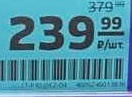

In [12]:
image = Image.open(train_dataset.root_dir + train_df[0][0]).convert("RGB")
image

In [13]:
labels = encoding['labels']
labels[labels == -100] = processor.tokenizer.pad_token_id
label_str = processor.decode(labels, skip_special_tokens=True)
print(type(label_str), label_str)

<class 'str'> 23999


  0%|          | 0/2920 [00:00<?, ?it/s]

pixel_values torch.Size([3, 384, 384])
labels torch.Size([15])


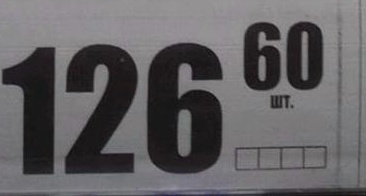

In [14]:
for encoding in tqdm(eval_dataset):
    for k,v in encoding.items():
        print(k, v.shape)
    break

image = Image.open(train_dataset.root_dir + test_df[0][0]).convert("RGB")
image

In [15]:
labels = encoding['labels']
labels[labels == -100] = processor.tokenizer.pad_token_id
label_str = processor.decode(labels, skip_special_tokens=True)
print(type(label_str), label_str)

<class 'str'> 12660


In [16]:
# set special tokens used for creating the decoder_input_ids from the labels
model.config.decoder_start_token_id = processor.tokenizer.cls_token_id
model.config.pad_token_id = processor.tokenizer.pad_token_id
# make sure vocab size is set correctly
model.config.vocab_size = model.config.decoder.vocab_size

# set beam search parameters
model.config.eos_token_id = processor.tokenizer.sep_token_id
model.config.max_length = 15
model.config.early_stopping = True
model.config.no_repeat_ngram_size = 3
model.config.length_penalty = 2.0
model.config.num_beams = 4

In [17]:
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    predict_with_generate=True,
    evaluation_strategy="epoch",
    save_strategy='epoch',
    logging_strategy='epoch',
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    fp16=True, 
    output_dir="./",
    logging_steps=2,
    num_train_epochs=50.0,
#     save_steps=10000,
#     eval_steps=5000,
    save_total_limit=2,
    dataloader_num_workers=4,
    learning_rate=1e-7,
)

In [18]:
from datasets import load_metric

cer_metric = load_metric("cer")
st_acc = load_metric('accuracy')

In [19]:
import numpy as np


def string_accuracy(st1: str, st2: str):
    if st1 == st2:
        return True
    else:
        return False


def compute_metrics(pred):
    labels_ids = pred.label_ids
    pred_ids = pred.predictions
    
    pred_str = processor.batch_decode(pred_ids, skip_special_tokens=True)

    labels_ids[labels_ids == -100] = processor.tokenizer.pad_token_id
    label_str = processor.batch_decode(labels_ids, skip_special_tokens=True)

    cer = cer_metric.compute(predictions=pred_str, references=label_str)
#     acc = st_acc.compute(predictions=pred_str, references=label_str)
    return {"cer": cer, "string_accuracy": (np.array(pred_str) == np.array(label_str)).mean()}

In [20]:
from transformers.integrations import TensorBoardCallback

In [ ]:
from transformers import default_data_collator

# instantiate trainer
trainer = Seq2SeqTrainer(
    model=model,
    tokenizer=processor.feature_extractor,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    data_collator=default_data_collator,
    callbacks=[TensorBoardCallback]
)
# trainer.train("./checkpoint-20000")
trainer.train()

You are adding a <class 'transformers.integrations.TensorBoardCallback'> to the callbacks of this Trainer, but there is already one. The currentlist of callbacks is
:DefaultFlowCallback
TensorBoardCallback
Using amp half precision backend
***** Running training *****
  Num examples = 6813
  Num Epochs = 50
  Instantaneous batch size per device = 1
  Total train batch size (w. parallel, distributed & accumulation) = 1
  Gradient Accumulation steps = 1
  Total optimization steps = 340650


Epoch,Training Loss,Validation Loss,Cer,String Accuracy
1,1.428600,0.667517,0.088264,0.822260
2,0.414100,0.547311,0.058412,0.892123
3,0.342700,0.504989,0.054007,0.907534
4,0.303200,0.479139,0.052564,0.913356
5,0.276400,0.455099,0.050817,0.917123
6,0.253200,0.450491,0.050209,0.920205
7,0.239900,0.431667,0.048842,0.923630
8,0.222600,0.437100,0.048842,0.923973
9,0.212900,0.430448,0.048538,0.925000
10,0.201700,0.425577,0.048386,0.926027


***** Running Evaluation *****
  Num examples = 2920
  Batch size = 1
Saving model checkpoint to ./checkpoint-6813
Configuration saved in ./checkpoint-6813/config.json
Model weights saved in ./checkpoint-6813/pytorch_model.bin
Configuration saved in ./checkpoint-6813/preprocessor_config.json
Deleting older checkpoint [checkpoint-333837] due to args.save_total_limit
IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_w

Deleting older checkpoint [checkpoint-149886] due to args.save_total_limit
IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Saving model checkpoint to ./checkpoint-170325
Configuration saved in ./checkpoint-170325/config.json
Model weights saved in ./checkpoint-170325/pytorch_model.bin
Configuration saved in ./checkpoint-170325/preprocessor_config.json
Deleting older checkpoint [checkpoint-156699] due to args.save_total_limit
IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceed

Deleting older checkpoint [checkpoint-306585] due to args.save_total_limit
IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Saving model checkpoint to ./checkpoint-327024
Configuration saved in ./checkpoint-327024/config.json
Model weights saved in ./checkpoint-327024/pytorch_model.bin
Configuration saved in ./checkpoint-327024/preprocessor_config.json
Deleting older checkpoint [checkpoint-313398

In [ ]:
trainer.evaluate()

In [ ]:
model.save_pretrained('printed-base')

In [27]:
import cv2 

for encoding in tqdm(eval_dataset):
    for k,v in encoding.items():
        print(k, v.shape)
    break

image = Image.open(train_dataset.root_dir + test_df[0][0]).convert("RGB")
image

pixel_values = processor(image, return_tensors="pt").pixel_values 
generated_ids = model.generate(pixel_values.cuda())

generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0] 

  0%|          | 0/2920 [00:00<?, ?it/s]

pixel_values torch.Size([3, 384, 384])
labels torch.Size([15])


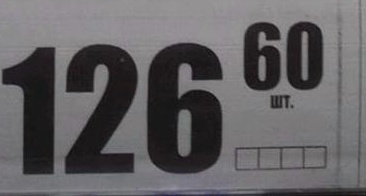

In [28]:
image

In [29]:
generated_text

'12660'

### Count String accuracy

In [30]:
def string_accuracy(st1: str, st2: str):
    if st1 == st2:
        return True
    else:
        return False


In [31]:
test_df.head()

,0,1
0,807.jpg,12660
1,913.jpg,7700
2,1209.jpg,12849
3,1388.jpg,11625
4,1580.jpg,9599


In [32]:
test_df.shape

(2920, 2)

In [33]:
val

NameError: name 'val' is not defined

In [34]:
acc = 0

for index, row in tqdm(test_df.iterrows(), total=test_df.shape[0]):
    filename = row[0]
    target_st = row[1]
    
    image = Image.open(eval_dataset.root_dir + filename).convert("RGB")
    pixel_values = processor(image, return_tensors="pt").pixel_values
    
    generated_ids = model.generate(pixel_values.cuda())
    
    try:
        generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0] 
        if string_accuracy(target_st, generated_text):
            acc += 1
    except Exception as e:
        print(filename, target_st)
        print(e)
        
print(f"Val files accuracy: {acc/test_df.shape[0]}")

  0%|          | 0/2920 [00:00<?, ?it/s]

Val files accuracy: 0.8708904109589041


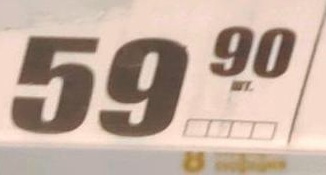

In [37]:
image

In [38]:
generated_text

'5990'

In [49]:
metrics = pd.read_csv('metrics.txt', header=None)

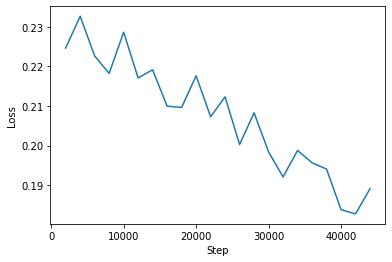

In [55]:
import matplotlib.pyplot as plt


plt.plot(metrics[0], metrics[3])

# plt.title()
plt.xlabel('Step')
plt.ylabel('Loss')
plt.show()

In [56]:
metrics

,0,1,2,3
0,2000,0.0006,2.823048,0.224611
1,4000,0.0317,2.883532,0.232662
2,6000,0.0000,2.682815,0.222636
3,8000,0.3584,2.741979,0.218230
4,10000,0.0003,2.750253,0.228637
5,12000,0.0000,2.607123,0.217091
6,14000,0.0000,2.606703,0.219142
7,16000,0.9242,2.649259,0.209951
8,18000,0.0037,2.677646,0.209647
9,20000,0.0000,2.597340,0.217622
